In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [40]:
data = pd.read_csv('loandata.csv')

In [41]:
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
data.tail(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [44]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [45]:
#Checking for null values in the dataset

data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [46]:
print(data[data.isnull().any(axis=1)])

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [47]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Dropping Null Values

datadrop = data.dropna()

In [49]:
datadrop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 8.1+ MB


In [50]:
# Filling up null values

datafill = data.fillna(0)

In [51]:
datafill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [52]:
  # Calculate the percentage of each class in the TARGET column
class_distribution = datafill['TARGET'].value_counts(normalize=True) * 100

print("Percentage of Default (1): {:.2f}%".format(class_distribution[1]))
print("Percentage of Repaid (0): {:.2f}%".format(class_distribution[0]))

Percentage of Default (1): 8.07%
Percentage of Repaid (0): 91.93%


<ipython-input-53-72530abe8215>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='Blues')


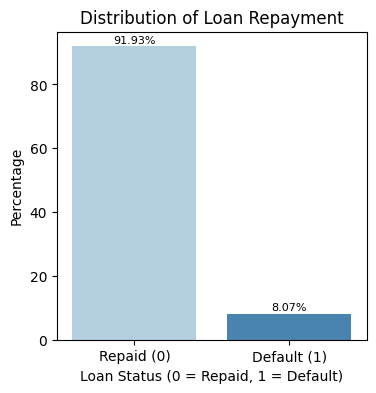

In [53]:
# Plot the distribution
plt.figure(figsize=(4, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='Blues')
plt.xlabel('Loan Status (0 = Repaid, 1 = Default)')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Repayment')
plt.xticks([0, 1], ['Repaid (0)', 'Default (1)'])  # Customize tick labels

for i, value in enumerate(class_distribution.values):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=8)

plt.show()

In [54]:
# Balancing the data
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = datafill.drop(columns=['TARGET'])
y = datafill['TARGET']

# Identify categorical columns with object dtype
categorical_cols = X.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
for col in categorical_cols:
    # Check if column has mixed types
    if X[col].apply(type).nunique() > 1:
        X[col] = X[col].astype(str)
    X[col] = label_encoder.fit_transform(X[col])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check new distribution
print("Balanced class distribution:\n", y_balanced.value_counts())

Balanced class distribution:
 TARGET
1    282686
0    282686
Name: count, dtype: int64


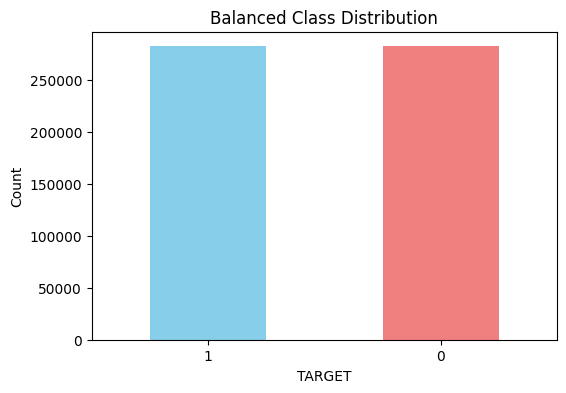

In [55]:
# Plot the balanced distribution

plt.figure(figsize=(6, 4))
y_balanced.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Balanced Class Distribution')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [57]:
# Display Encoded data
X_balanced.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_balanced.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_balanced, y_balanced, epochs=20, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.5524 - loss: 580.8669 - val_accuracy: 0.3158 - val_loss: 10.9353
Epoch 2/20
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.5685 - loss: 6.7470 - val_accuracy: 3.8912e-04 - val_loss: 0.9982
Epoch 3/20
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.6247 - loss: 1.3008 - val_accuracy: 4.4218e-05 - val_loss: 1.0217
Epoch 4/20
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.6240 - loss: 3.0009 - val_accuracy: 4.4218e-05 - val_loss: 0.9780
Epoch 5/20
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.6253 - loss: 2.6273 - val_accuracy: 4.4218e-05 - val_loss: 0.9853
Epoch 6/20
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.6249 - loss: 0.6668 - val_accuracy: 0.0000e+00 - val_loss: 27.1363
Epoch 7/20
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.6250 - loss: 1.1587 - val_accuracy: 3.5375e-05 - val_loss: 1.1660
Epoch 8/20
14135/14135 ━━━━━━━━━━━━━━━━━━

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     56536
           1       1.00      0.91      0.95     56539

    accuracy                           0.95    113075
   macro avg       0.96      0.95      0.95    113075
weighted avg       0.96      0.95      0.95    113075

Sensitivity (Recall): 0.9076036010541396


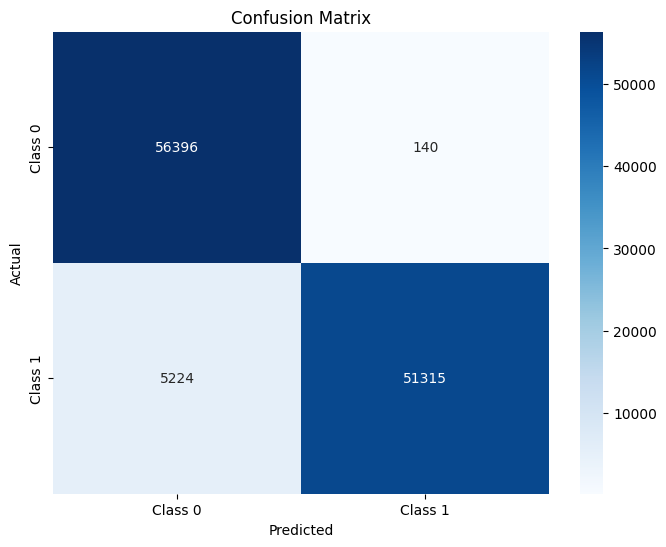

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train a Random Forest model
datafill = RandomForestClassifier(random_state=42)
datafill.fit(X_train, y_train)

# Make predictions
y_pred = datafill.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

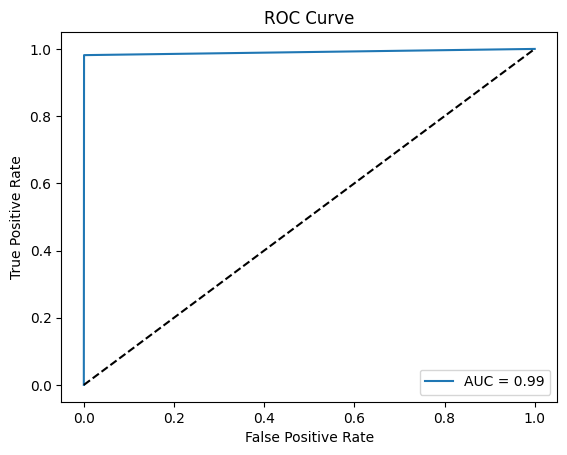

AUC: 0.99


In [60]:
# Calculate the area under the ROC curve

from sklearn.metrics import roc_curve, auc

y_prob = datafill.predict(X_balanced).ravel()
fpr, tpr, thresholds = roc_curve(y_balanced, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC: {:.2f}".format(roc_auc))

Scenario with Dropped Values

In [61]:
# Scenario with dropped values

datadrop.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 8.1+ MB


In [62]:
  # Calculate the percentage of each class in the TARGET column
class_distribution = datadrop['TARGET'].value_counts(normalize=True) * 100

print("Percentage of Default (1): {:.2f}%".format(class_distribution[1]))
print("Percentage of Repaid (0): {:.2f}%".format(class_distribution[0]))

Percentage of Default (1): 6.11%
Percentage of Repaid (0): 93.89%


<ipython-input-63-72530abe8215>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='Blues')


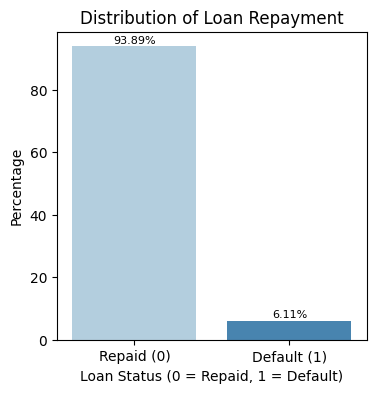

In [63]:
# Plot the distribution
plt.figure(figsize=(4, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='Blues')
plt.xlabel('Loan Status (0 = Repaid, 1 = Default)')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Repayment')
plt.xticks([0, 1], ['Repaid (0)', 'Default (1)'])  # Customize tick labels

for i, value in enumerate(class_distribution.values):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=8)

plt.show()

In [64]:
# Balancing the data
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = datadrop.drop(columns=['TARGET'])
y = datadrop['TARGET']

# Identify categorical columns with object dtype
categorical_cols = X.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
for col in categorical_cols:
    # Check if column has mixed types
    if X[col].apply(type).nunique() > 1:
        X[col] = X[col].astype(str)
    X[col] = label_encoder.fit_transform(X[col])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check new distribution
print("Balanced class distribution:\n", y_balanced.value_counts())

Balanced class distribution:
 TARGET
0    8076
1    8076
Name: count, dtype: int64


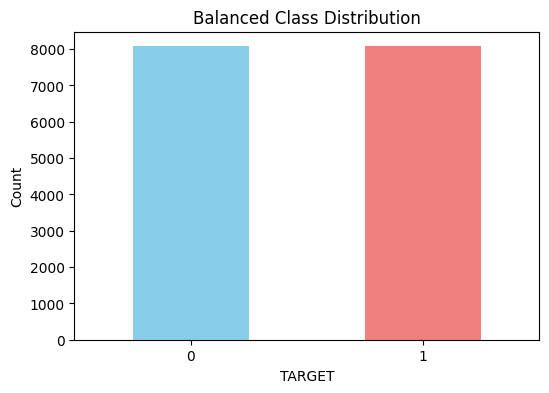

In [65]:
# Plot the balanced distribution
plt.figure(figsize=(6, 4))
y_balanced.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Balanced Class Distribution')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [66]:
# Display Encoded data
X_balanced.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100083,0,1,0,1,0,103500.0,573628.5,24435.0,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,100145,0,0,0,1,1,202500.0,260725.5,16789.5,198000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100179,0,0,0,0,0,202500.0,675000.0,53329.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
3,100190,0,1,0,0,0,162000.0,263686.5,24781.5,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100295,0,1,0,0,1,225000.0,1019205.0,31032.0,774000.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_balanced.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_balanced, y_balanced, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5355 - loss: 11578.8506 - val_accuracy: 0.0811 - val_loss: 1427.3630
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5618 - loss: 674.1712 - val_accuracy: 0.6893 - val_loss: 165.6506
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5695 - loss: 646.8553 - val_accuracy: 0.3723 - val_loss: 526.2862
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5723 - loss: 550.9702 - val_accuracy: 0.5772 - val_loss: 205.6171
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5644 - loss: 555.7002 - val_accuracy: 0.8403 - val_loss: 80.6035
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5787 - loss: 443.0317 - val_accuracy: 0.0031 - val_loss: 1431.0680
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5679 - loss: 574.4253 - val_accuracy: 0.6261 - val_loss: 154.9545
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5742 - loss: 349.2

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1607
           1       0.99      0.94      0.97      1624

    accuracy                           0.97      3231
   macro avg       0.97      0.97      0.97      3231
weighted avg       0.97      0.97      0.97      3231

Sensitivity (Recall): 0.9396551724137931


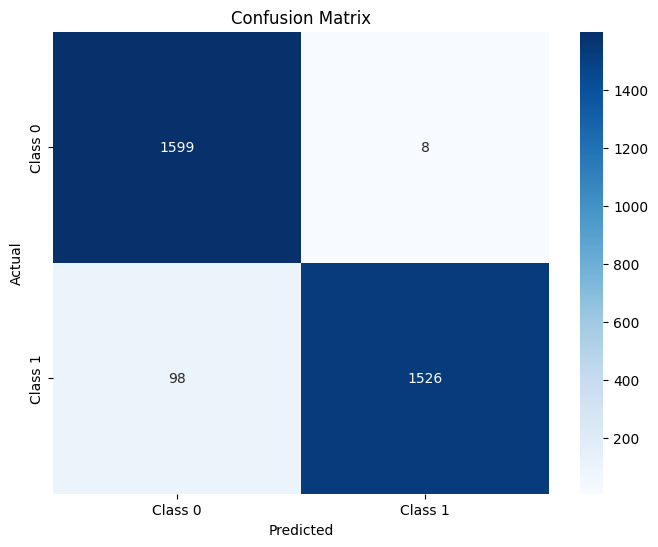

In [69]:
# Calculate sensitivity as a metric

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train a Random Forest model
datadrop = RandomForestClassifier(random_state=42)
datadrop.fit(X_train, y_train)

# Make predictions
y_pred = datadrop.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

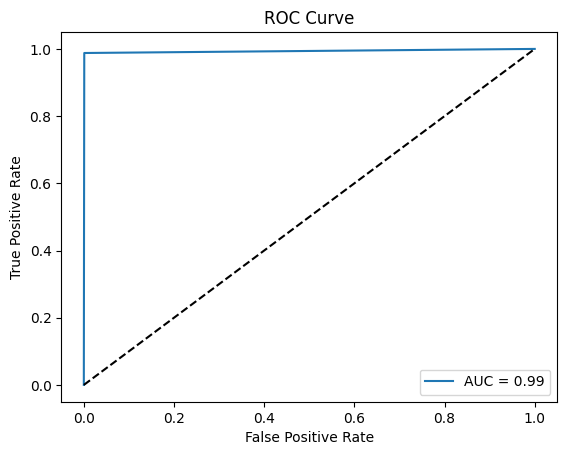

AUC: 0.99


In [70]:
# Calculate the area under the ROC curve

from sklearn.metrics import roc_curve, auc

y_prob = datadrop.predict(X_balanced).ravel()
fpr, tpr, thresholds = roc_curve(y_balanced, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC: {:.2f}".format(roc_auc))